# 3.2

## Загрузка и первоначальный осмотр данных

In [6]:
import pandas as pd
import numpy as np

df_titanic = pd.read_csv('Titanic.csv')

## Задание 1: Предобработка данных

In [7]:
initial_rows = len(df_titanic)
print(f"Начальное количество строк: {initial_rows}")

df_titanic_cleaned = df_titanic.dropna()
rows_after_dropna = len(df_titanic_cleaned)
print(f"Количество строк после удаления пропусков (dropna): {rows_after_dropna}")

df_before_column_drop = df_titanic_cleaned.copy()

non_numeric_cols = df_titanic_cleaned.select_dtypes(include=['object']).columns
cols_to_drop = [col for col in non_numeric_cols if col not in ['Sex', 'Embarked']]
df_titanic_cleaned = df_titanic_cleaned.drop(columns=cols_to_drop)
print(f"Столбцы после удаления нечисловых (кроме Sex, Embarked): {df_titanic_cleaned.columns.tolist()}")

df_titanic_cleaned['Sex'] = df_titanic_cleaned['Sex'].map({'male': 0, 'female': 1})
df_titanic_cleaned['Embarked'] = df_titanic_cleaned['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

if 'PassengerId' in df_titanic_cleaned.columns:
    df_titanic_cleaned = df_titanic_cleaned.drop(columns=['PassengerId'])
    print("Столбец 'PassengerId' удален.")
else:
    print("Столбец 'PassengerId' уже был удален или отсутствовал.")

loss_after_step1_1 = (initial_rows - rows_after_dropna) / initial_rows * 100
print(f"\nПроцент потерянных данных: {loss_after_step1_1:.2f}%")

Начальное количество строк: 891
Количество строк после удаления пропусков (dropna): 183
Столбцы после удаления нечисловых (кроме Sex, Embarked): ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Столбец 'PassengerId' удален.

Процент потерянных данных: 79.46%


## Задание 2: Машинное обучение

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df_titanic_cleaned.drop('Survived', axis=1)
y = df_titanic_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Размер обучающей выборки: {X_train.shape}, тестовой: {X_test.shape}")


model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели логистической регрессии (со всеми признаками): {accuracy:.4f}")

print("\nОценка влияния признака 'Embarked':")
X_no_embarked = X.drop('Embarked', axis=1)
X_train_ne, X_test_ne, y_train_ne, y_test_ne = train_test_split(X_no_embarked, y, test_size=0.3, random_state=42, stratify=y)

model_ne = LogisticRegression(random_state=42, max_iter=1000)
model_ne.fit(X_train_ne, y_train_ne)
y_pred_ne = model_ne.predict(X_test_ne)
accuracy_ne = accuracy_score(y_test_ne, y_pred_ne)
print(f"Точность модели без признака 'Embarked': {accuracy_ne:.4f}")
print(f"Разница в точности: {accuracy - accuracy_ne:.4f}")


Размер обучающей выборки: (146, 7), тестовой: (37, 7)

Точность модели логистической регрессии (со всеми признаками): 0.7838

Оценка влияния признака 'Embarked':
Точность модели без признака 'Embarked': 0.7455
Разница в точности: 0.0383


# 3.3

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    precision_recall_curve, 
    roc_curve, 
    roc_auc_score,
    classification_report
)

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

## Часть 1: Оценка модели логистической регрессии

--- Логистическая регрессия ---
Accuracy: 0.7838
Precision: 0.7931
Recall: 0.9200
F1 Score: 0.8519
ROC AUC Score: 0.8733

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.79      0.92      0.85        25

    accuracy                           0.78        37
   macro avg       0.77      0.71      0.73        37
weighted avg       0.78      0.78      0.77        37



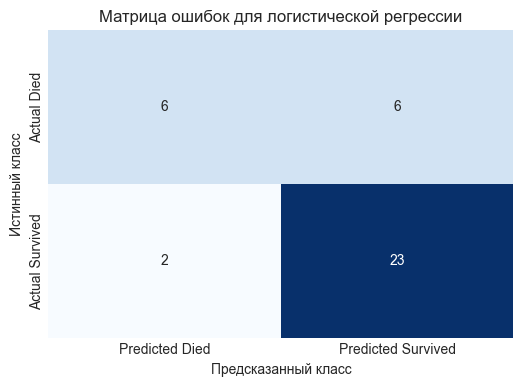

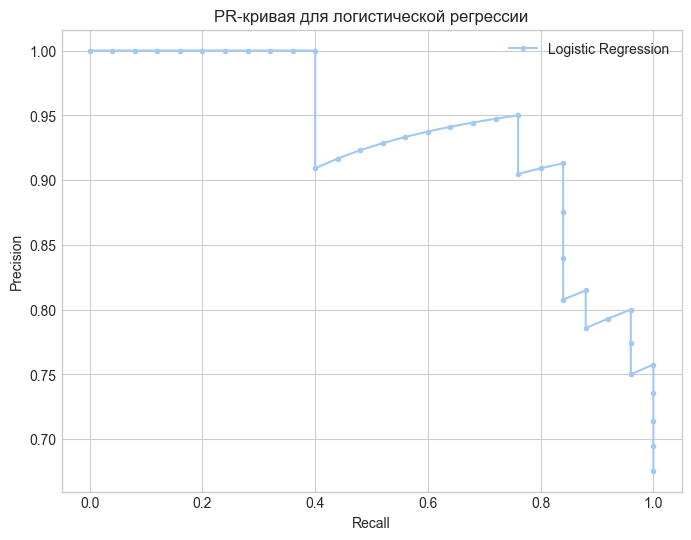

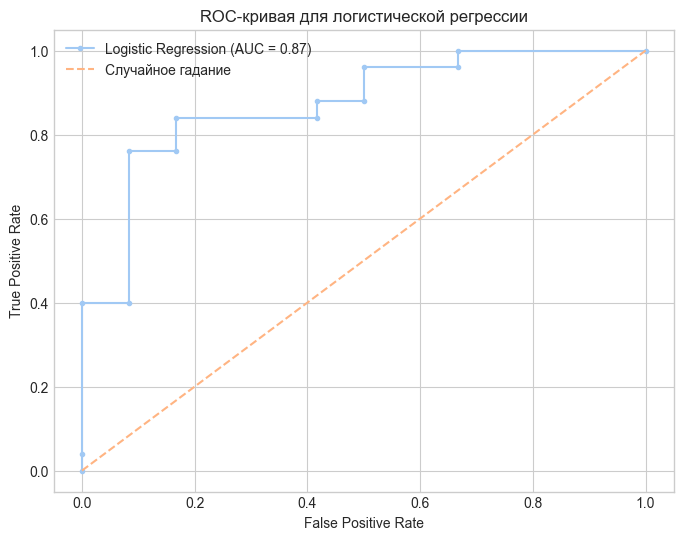

In [15]:
log_reg_model = model
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

print("--- Логистическая регрессия ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_log_reg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
            yticklabels=['Actual Died', 'Actual Survived'])
plt.title('Матрица ошибок для логистической регрессии')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, marker='.', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_log_reg):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайное гадание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()


## Часть 2: Сравнение с моделями SVM и KNN

### 2.1 Масштабирование данных
Модели SVM и KNN чувствительны к масштабу признаков, поэтому перед их обучением проведем масштабирование.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Данные успешно масштабированы.")

Данные успешно масштабированы.


### 2.2 Модель опорных векторов (SVM)

--- SVM ---
Accuracy: 0.7297
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
ROC AUC Score: 0.8533

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.80      0.80      0.80        25

    accuracy                           0.73        37
   macro avg       0.69      0.69      0.69        37
weighted avg       0.73      0.73      0.73        37



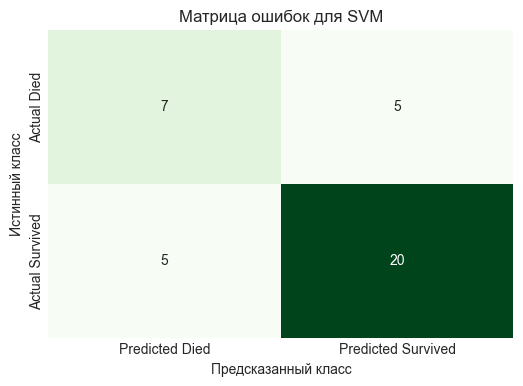

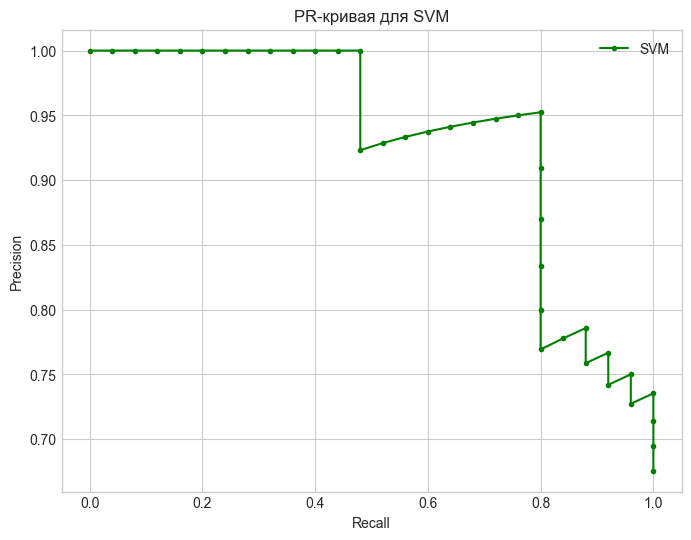

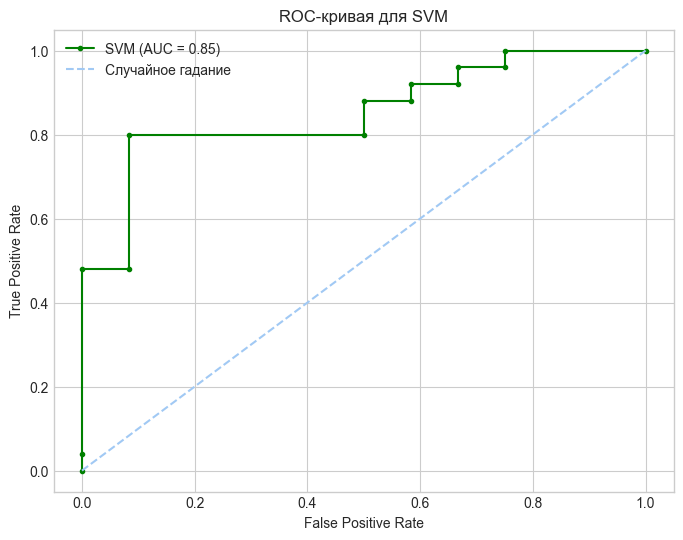

In [17]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("--- SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
            yticklabels=['Actual Died', 'Actual Survived'])
plt.title('Матрица ошибок для SVM')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, marker='.', label='SVM', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для SVM')
plt.legend()
plt.grid(True)
plt.show()

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM (AUC = {roc_auc_score(y_test, y_pred_proba_svm):.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайное гадание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для SVM')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 Модель ближайших соседей (KNN)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучший k для KNN: 8
--- KNN (k=5) ---
Accuracy: 0.8108
Precision: 0.8000
Recall: 0.9600
F1 Score: 0.8727
ROC AUC Score: 0.8783

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.80      0.96      0.87        25

    accuracy                           0.81        37
   macro avg       0.83      0.73      0.75        37
weighted avg       0.82      0.81      0.79        37



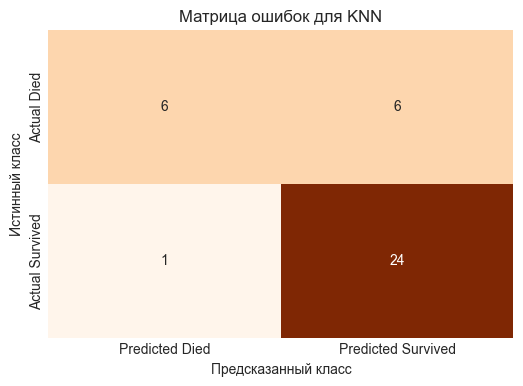

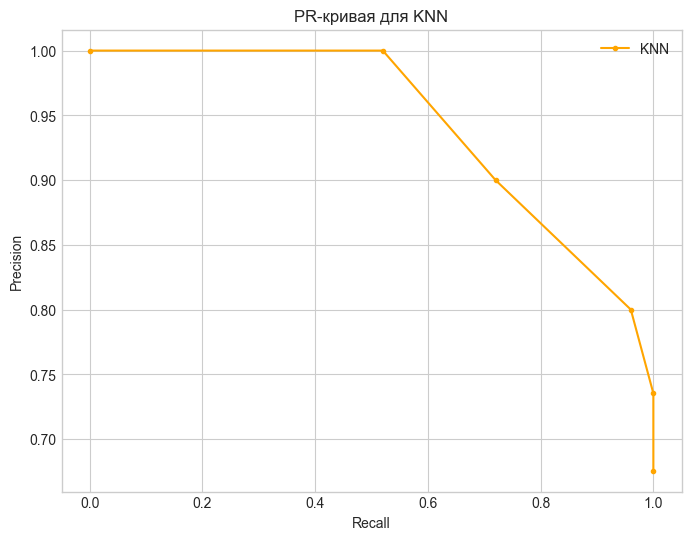

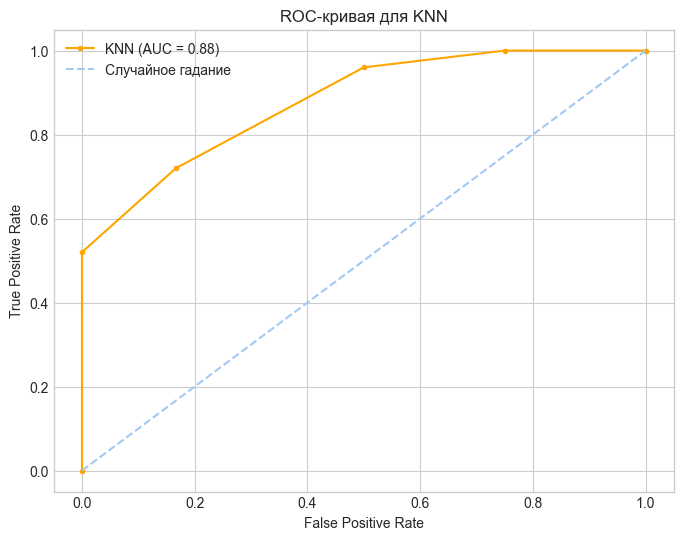

In [23]:
knn_k = 5
knn_model = KNeighborsClassifier(n_neighbors=knn_k)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print(f"--- KNN (k={knn_k}) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
            yticklabels=['Actual Died', 'Actual Survived'])
plt.title('Матрица ошибок для KNN')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, marker='.', label='KNN', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая для KNN')
plt.legend()
plt.grid(True)
plt.show()

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, marker='.', label=f'KNN (AUC = {roc_auc_score(y_test, y_pred_proba_knn):.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайное гадание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для KNN')
plt.legend()
plt.grid(True)
plt.show()


## 3. Сравнение моделей и общие выводы

Здесь можно построить сводные графики PR и ROC кривых для всех трех моделей для наглядного сравнения.

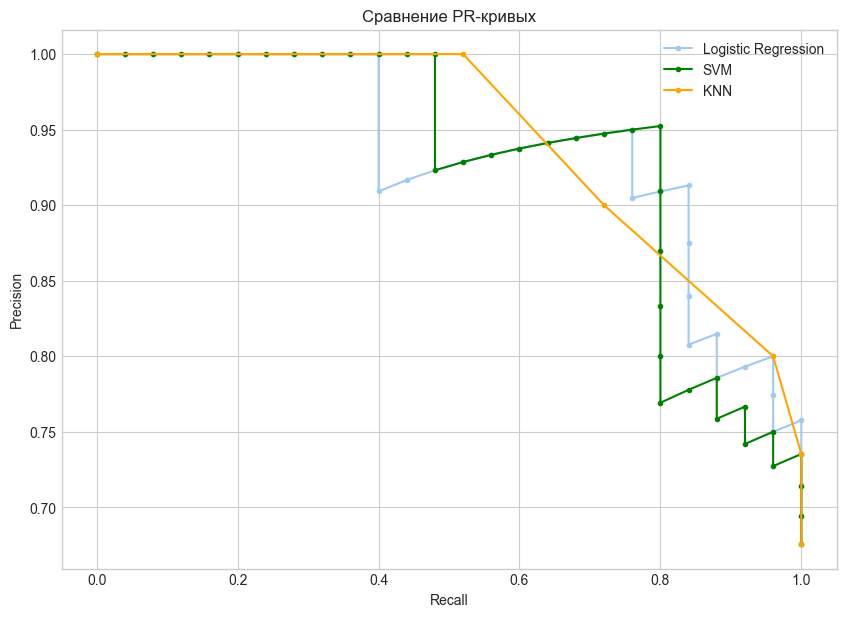

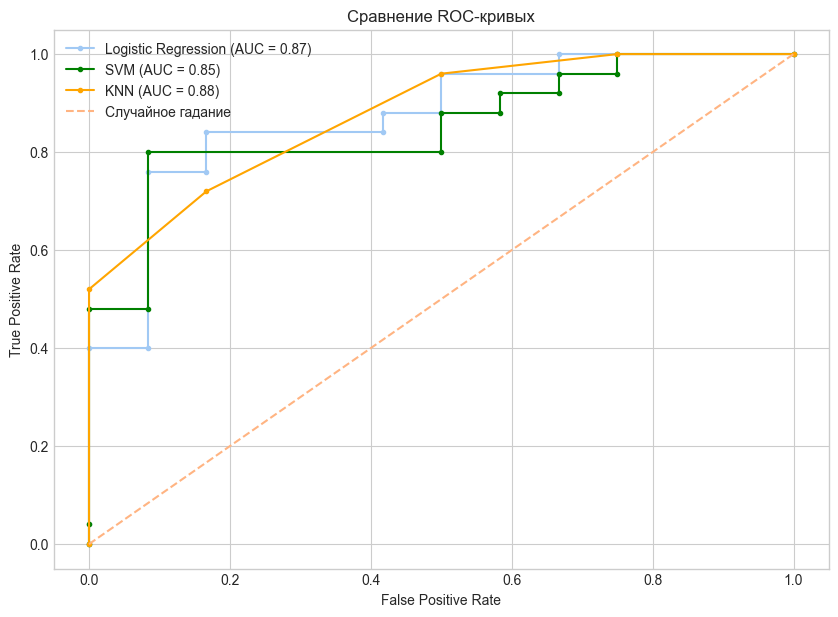

In [24]:
plt.figure(figsize=(10, 7))
if 'precision_lr' in globals():
    plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')
if 'precision_svm' in globals():
    plt.plot(recall_svm, precision_svm, marker='.', label='SVM', color='green')
if 'precision_knn' in globals():
    plt.plot(recall_knn, precision_knn, marker='.', label='KNN', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Сравнение PR-кривых')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
if 'fpr_lr' in globals():
    plt.plot(fpr_lr, tpr_lr, marker='.', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_log_reg):.2f})')
if 'fpr_svm' in globals():
    plt.plot(fpr_svm, tpr_svm, marker='.', label=f'SVM (AUC = {roc_auc_score(y_test, y_pred_proba_svm):.2f})', color='green')
if 'fpr_knn' in globals():
    plt.plot(fpr_knn, tpr_knn, marker='.', label=f'KNN (AUC = {roc_auc_score(y_test, y_pred_proba_knn):.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайное гадание')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых')
plt.legend()
plt.grid(True)
plt.show()

### Итоговый вывод о наилучшей модели

Судя по представленным графикам, наилучшей из трёх рассмотренных моделей является KNN.

Вот почему:

PR-кривая (верхний график "Сравнение PR-кривых"): 
- Кривая KNN (оранжевая) в целом расположена выше и правее остальных. Это означает, что для большинства значений полноты KNN обеспечивает более высокую точность.
- Особенно заметно, что KNN дольше других моделей удерживает максимальную точность (1.0) при увеличении полноты.

ROC-кривая (нижний график "Сравнение ROC-кривых"):
- KNN имеет самое высокое значение AUC (Area Under Curve - площадь под кривой), равное 0.88.
- Логистическая регрессия имеет AUC = 0.87.
- SVM имеет AUC = 0.85.
- Более высокое значение AUC указывает на лучшую общую способность модели различать между классами (лучше отделять истинно положительные случаи от ложно положительных).

Итоговый вывод:

Хотя Логистическая регрессия очень близка к KNN по значению AUC-ROC, KNN показывает явное преимущество на PR-кривой, что особенно важно, если вам нужно поддерживать высокую точность. SVM уступает обеим моделям по обоим показателям.
Таким образом, KNN является наиболее предпочтительной моделью на основе представленных данных.